<a href="https://colab.research.google.com/github/rbbh/ARIMA-SVR-PSO-ensemble/blob/master/N_Experiments_of_ARIMA_%2B_(SVR_%2B_PSO)_Val_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import svm
from mpl_toolkits.mplot3d import axes3d, Axes3D
from google.colab import files

In [0]:
import io
import pandas as pd

In [113]:
uploaded = files.upload()   

Saving electric.txt to electric.txt


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['electric.txt']))

In [115]:
uploaded = files.upload()

Saving electric_ARIMA.txt to electric_ARIMA.txt


In [0]:
data_ARIMA = pd.read_csv(io.BytesIO(uploaded['electric_ARIMA.txt']))

In [117]:
uploaded = files.upload()

Saving electric_r.txt to electric_r.txt


In [0]:
data_r = pd.read_csv(io.BytesIO(uploaded['electric_r.txt']))

In [119]:
data_r.describe()

Residuo
count     $486.00
mean   $-1,240.27
std    $12,329.10
min   $-44,710.96
25%    $-6,254.44
50%       $690.11
75%     $6,122.04
max    $32,823.28

Original time series:



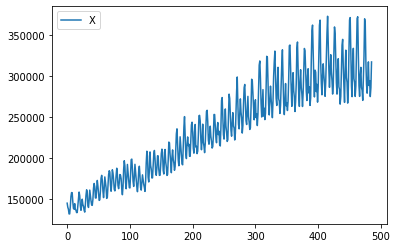

In [120]:
print('Original time series:\n')
data.plot()

Residuals over time:



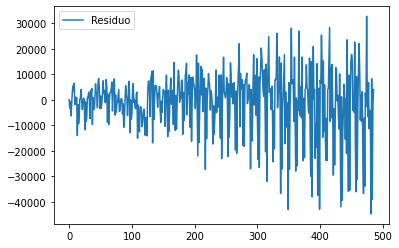

In [121]:
print('Residuals over time:\n')
data_r.plot()

In [122]:
len(data)

486

In [0]:
#Scaling the data
from sklearn import preprocessing

data_r_n = data_r.copy()

data_r_n = (data_r - data_r.min())/(data_r.max() - data_r.min())

data_r_n = pd.DataFrame(data_r_n)



In [124]:
# TODO: Create function for the Lag used for the prediction
# We will use 12 for the lag dimension if the series repeats 
# itself annually, 3 if it is trimestrial etc.

# Note: For the "ONS" data base, make "dimensions" = 3
# NOTE: For the "Milk" data base, make "dimensions" = 24

dimensions = 12
data_cn = pd.concat([data_r_n.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_cn)

     Residuo  Residuo  Residuo  Residuo  ...  Residuo  Residuo  Residuo  Residuo
0      $0.58     $nan     $nan     $nan  ...     $nan     $nan     $nan     $nan
1      $0.53    $0.58     $nan     $nan  ...     $nan     $nan     $nan     $nan
2      $0.57    $0.53    $0.58     $nan  ...     $nan     $nan     $nan     $nan
3      $0.50    $0.57    $0.53    $0.58  ...     $nan     $nan     $nan     $nan
4      $0.56    $0.50    $0.57    $0.53  ...     $nan     $nan     $nan     $nan
..       ...      ...      ...      ...  ...      ...      ...      ...      ...
481    $0.00    $0.49    $0.52    $0.43  ...    $0.61    $0.14    $0.48    $0.10
482    $0.68    $0.00    $0.49    $0.52  ...    $0.54    $0.61    $0.14    $0.48
483    $0.07    $0.68    $0.00    $0.49  ...    $1.00    $0.54    $0.61    $0.14
484    $0.55    $0.07    $0.68    $0.00  ...    $0.58    $1.00    $0.54    $0.61
485    $0.63    $0.55    $0.07    $0.68  ...    $0.49    $0.58    $1.00    $0.54

[486 rows x 13 columns]


In [125]:
# Splitting the residual data into train, validation and test

from sklearn.model_selection import train_test_split

X = data_cn.iloc[12:,1:]

y = data_cn.iloc[12:,0]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3670, shuffle = False)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5517, shuffle = False)


print(len(y_val))
print(len(y_test))
print(len(y_train))


78
96
300


In [126]:
dimensions = 12
data_c2n = pd.concat([data_ARIMA.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c2n)

          ARIMA       ARIMA       ARIMA  ...       ARIMA       ARIMA       ARIMA
0   $144,365.93        $nan        $nan  ...        $nan        $nan        $nan
1   $142,899.75 $144,365.93        $nan  ...        $nan        $nan        $nan
2   $137,719.85 $142,899.75 $144,365.93  ...        $nan        $nan        $nan
3   $137,669.66 $137,719.85 $142,899.75  ...        $nan        $nan        $nan
4   $132,506.71 $137,669.66 $137,719.85  ...        $nan        $nan        $nan
..          ...         ...         ...  ...         ...         ...         ...
481 $333,390.96 $324,101.26 $299,779.76  ... $304,169.60 $289,744.07 $322,873.84
482 $286,154.73 $333,390.96 $324,101.26  ... $292,685.82 $304,169.60 $289,744.07
483 $313,988.05 $286,154.73 $333,390.96  ... $326,983.19 $292,685.82 $304,169.60
484 $288,123.12 $313,988.05 $286,154.73  ... $337,386.72 $326,983.19 $292,685.82
485 $313,365.89 $288,123.12 $313,988.05  ... $363,810.32 $337,386.72 $326,983.19

[486 rows x 13 columns]


In [127]:
# Splitting the ARIMA predictions into train, validation and test

from sklearn.model_selection import train_test_split

X_ARIMA = data_c2n.iloc[12:,1:]

y_ARIMA = data_c2n.iloc[12:,0]

X_train_ARIMA, X_val_ARIMA, y_train_ARIMA, y_val_ARIMA = train_test_split(X_ARIMA, y_ARIMA, test_size = 0.3670, shuffle = False)

X_val_ARIMA, X_test_ARIMA, y_val_ARIMA, y_test_ARIMA = train_test_split(X_val_ARIMA, y_val_ARIMA, test_size = 0.5517, shuffle = False)

print(len(y_val_ARIMA))
print(len(y_test_ARIMA))
print(len(y_train_ARIMA))

78
96
300


In [128]:
dimensions = 12
data_c3n = pd.concat([data.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c3n)

          X           X           X  ...           X           X           X
0    144510        $nan        $nan  ...        $nan        $nan        $nan
1    139550 $144,510.00        $nan  ...        $nan        $nan        $nan
2    137100 $139,550.00 $144,510.00  ...        $nan        $nan        $nan
3    131370 $137,100.00 $139,550.00  ...        $nan        $nan        $nan
4    131360 $131,370.00 $137,100.00  ...        $nan        $nan        $nan
..      ...         ...         ...  ...         ...         ...         ...
481  288680 $317,480.00 $295,670.00  ... $270,350.00 $282,610.00 $286,180.00
482  294500 $288,680.00 $317,480.00  ... $295,420.00 $270,350.00 $282,610.00
483  275030 $294,500.00 $288,680.00  ... $324,460.00 $295,420.00 $270,350.00
484  285910 $275,030.00 $294,500.00  ... $370,210.00 $324,460.00 $295,420.00
485  317420 $285,910.00 $275,030.00  ... $363,980.00 $370,210.00 $324,460.00

[486 rows x 13 columns]


In [129]:
# Splitting the raw data into train, validation and test

from sklearn.model_selection import train_test_split

X_raw = data_c3n.iloc[12:,1:]

y_raw = data_c3n.iloc[12:,0]

X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(X_raw, y_raw, test_size = 0.3670, shuffle = False)

X_val_raw, X_test_raw, y_val_raw, y_test_raw = train_test_split(X_val_raw, y_val_raw, test_size = 0.5517, shuffle = False)

print(len(y_val_raw))
print(len(y_test_raw))
print(len(y_train_raw))

78
96
300


In [0]:
def pso(n_particles, iterations, dimensions, inertia, k_best_particles, experiments):

    # Range of SVR's hyperparameters (Particles' search space)
    # C, Epsilon and Gamma
    max_c = 1e4
    min_c = 1e-3
    max_e = 1e-1
    min_e = 1e-8
    max_g = 1e3
    min_g = 1e-3
    

    # Initializing regression variables    
    p_best_RGS = np.empty((n_particles), dtype = object);
    g_best_RGS = sys.maxsize

    # Initializing variables for experiment collection
    g_bests = []
    g_bests_RGS_experiment = []
    mse_residuals = []
    mse_residuals_val = []
    final_experiment_predictions = []
    final_experiment_predictions_val = []

    last_configurations = []
    
    average_particles = []
    average_particles_val = []
    mse_averages = []
    mse_averages_val = []
    final_experiment_averages = []
    final_experiment_averages_val = []

    median_particles = []
    median_particles_val = []
    mse_medians = []
    mse_medians_val = []
    final_experiment_medians = []
    final_experiment_medians_val = []

    average_k_best_predictions = []
    average_k_best_predictions_val = []
    mse_averages_k_best = []
    mse_averages_k_best_val = []
    final_experiment_k_averages = []
    final_experiment_k_averages_val = []

    median_k_best_predictions = []
    median_k_best_predictions_val = []
    mse_medians_k_best = []
    mse_medians_k_best_val = []
    final_experiment_k_medians = []
    final_experiment_k_medians_val = []

    mse_ARIMA = []
    mse_ARIMA_val = []
    
    mse_ensemble = []
    mse_ensemble_val = []

    from sklearn.metrics import mean_squared_error

    for e in range(experiments):
      
        # Initializing particles' positions randomly, inside
        # the search space
        x = np.random.rand(n_particles, 1)*(max_c - min_c) + min_c
        y = np.random.rand(n_particles, 1)*(max_e - min_e) + min_e
        z = np.random.rand(n_particles, 1)*(max_g - min_g) + min_g

        c = np.concatenate((x,y,z), axis=1)

        if(e == 0):
            # Displaying tridimensional search space
            plot(c)

        # Initializing particles' parameters
        v = np.zeros((n_particles, dimensions))
        c1 = 2
        c2 = 2
        p_best = np.zeros((n_particles, dimensions))
        p_best_val = np.zeros(n_particles) + sys.maxsize  
        g_best = np.zeros(dimensions)
        g_best_val = sys.maxsize

        best_iter = np.zeros(iterations)

        for i in range(iterations):

            for j in range(n_particles):
              
                # Starting Regression
                rgs = svm.SVR(C = c[j][0], epsilon = c[j][1], gamma = c[j][2])

                # Fitting the curve
                rgs.fit(X_train, y_train)
                y_predict = rgs.predict(X_val)

                # Using Mean Squared Error to verify prediction accuracy
                mse = mean_squared_error(y_val, y_predict) 

                # If mse value for that search point, for that particle,
                # is less than its personal best point,
                # replace personal best
                if(mse < p_best_val[j]):   
                    # The value below represents the current least Mean Squared Error
                    p_best_val[j] = mse
                    
                    # The value below represents the current least Regressor
                    p_best_RGS[j] = rgs
                                

                    # The value below represents the current search coordinates for
                    # the particle's current least Mean Squared Error found
                    p_best[j] = c[j].copy()
                    
                # Using auxiliar variable to get the index of the
                # particle that found the configuration with the 
                # minimum MSE value
                aux = np.argmin(p_best_val)        
              
                if(p_best_val[aux] < g_best_val):
                    # Assigning Particle's current best MSE to the Group's best    
                    g_best_val = p_best_val[aux]

                    # Assigning Particle's current best configuration to the Group's best
                    g_best = p_best[aux].copy()

                    # Group best regressor:
                    # the combination of C, Epsilon and Gamma
                    # that computes the best fitting curve
                    g_best_RGS = p_best_RGS[aux]

              
                rand1 = np.random.random()
                rand2 = np.random.random()

                # The variable below influences directly the particle's velocity.
                # It can either make it smaller or bigger. 
                w = inertia

                # The equation below represents Particle's velocity, which is
                # the rate of change in its position
                v[j] = w*v[j] + c1*(p_best[j] - c[j])*rand1 + c2*(g_best - c[j])*rand2

                # Change in the Particle's position 
                c[j] = c[j] + v[j]

                # Below is a series of conditions that stop the particles from
                # leaving the search space
                if(c[j][2] < min_g):
                  c[j][2] = min_g
                if(c[j][2] > max_g):
                  c[j][2] = max_g
                if(c[j][1] < min_e):
                  c[j][1] = min_e
                if(c[j][1] > max_e):
                  c[j][1] = max_e
                if(c[j][0] < min_c):
                  c[j][0] = min_c
                if(c[j][0] > max_c):
                  c[j][0] = max_c
                
        
        # Storing last particles` positions
        # for later use
        last_configurations.append(c)

        # Making the prediction with the best configuration of C, Epsilon and
        # Gamma found by the particles
        predict_val = g_best_RGS.predict(X_val)
        
        predict_test = g_best_RGS.predict(X_test)

     
        g_bests_RGS_experiment.append(g_best_RGS)
        g_bests.append(g_best)

      
        mse_r_val = mean_squared_error(y_val, predict_val)
        mse_r = mean_squared_error(y_test, predict_test)
        
   
        mse_residuals_val.append(mse_r_val)
        mse_residuals.append(mse_r)

       
        # Taking all particles' final predictions,
        # getting their averages and medians and
        # getting the k best subset of particles
        # to see the final prediction without outliers
        k = k_best_particles
        average_p_val, median_p_val, av_k_best_p_val, md_k_best_p_val = particles_last_predictions(c, n_particles, k, X_val, y_val)
        average_p, median_p, av_k_best_p, md_k_best_p = particles_last_predictions(c, n_particles, k, X_test, y_test)
       
        average_particles_val.append(average_p_val)
        median_particles_val.append(median_p_val)
        average_k_best_predictions_val.append(av_k_best_p_val)
        median_k_best_predictions_val.append(md_k_best_p_val)
             
        average_particles.append(average_p)
        median_particles.append(median_p)
        average_k_best_predictions.append(av_k_best_p)
        median_k_best_predictions.append(md_k_best_p)
       
        mse_e_val, mse_AR_val = residual_performance(predict_val, y_val_ARIMA, y_val_raw)
       
        mse_e, mse_AR = residual_performance(predict_test, y_test_ARIMA, y_test_raw)
       
        # Storing the Ensemble's (final system) mse
        mse_ARIMA_val.append(mse_AR_val)
        mse_ensemble_val.append(mse_e_val)
        
        mse_ARIMA.append(mse_AR)
        mse_ensemble.append(mse_e)
     
        # Storing the mse of the average predictions
        mse_A_val, mse_AR_val = residual_performance(average_p_val, y_val_ARIMA, y_val_raw)
        mse_A, mse_AR = residual_performance(average_p, y_test_ARIMA, y_test_raw)
   
        mse_averages_val.append(mse_A_val)
        mse_averages.append(mse_A)
       
        # Storing the mse of the average k best predictions
        mse_A_k_best_val, mse_AR_val = residual_performance(av_k_best_p_val, y_val_ARIMA, y_val_raw)
        mse_A_k_best, mse_AR = residual_performance(av_k_best_p, y_test_ARIMA, y_test_raw)
        
        mse_averages_k_best_val.append(mse_A_k_best_val)
        mse_averages_k_best.append(mse_A_k_best)
        
        # Storing the mse of the median predictions
        mse_M_val, mse_AR_val = residual_performance(median_p_val, y_val_ARIMA, y_val_raw)
        mse_M, mse_AR = residual_performance(median_p, y_test_ARIMA, y_test_raw)
        
        mse_medians_val.append(mse_M_val)
        mse_medians.append(mse_M)
        
        # Storing the mse of the median k best predictions
        mse_M_k_best_val, mse_AR_val = residual_performance(md_k_best_p_val, y_val_ARIMA, y_val_raw)
        mse_M_k_best, mse_AR = residual_performance(md_k_best_p, y_test_ARIMA, y_test_raw)
      
        mse_medians_k_best_val.append(mse_M_k_best_val)
        mse_medians_k_best.append(mse_M_k_best)
      
        # Getting the final results of the current experiment
        # and storing them
        final_exp_p_val, final_exp_av_val, final_exp_md_val, final_exp_av_k_val, final_exp_md_k_val = results(g_best_RGS, average_p_val, median_p_val, av_k_best_p_val, md_k_best_p_val, y_val_raw, y_val_ARIMA, X_val)
               

        final_exp_p, final_exp_av, final_exp_md, final_exp_av_k, final_exp_md_k = results(g_best_RGS, average_p, median_p, av_k_best_p, md_k_best_p, y_test_raw, y_test_ARIMA, X_test)
        
     

        final_exp_p_val = final_exp_p_val.tolist()
        final_exp_av_val = final_exp_av_val.tolist()
        final_exp_md_val = final_exp_md_val.tolist()
        final_exp_av_k_val = final_exp_av_k_val.tolist()
        final_exp_md_k_val = final_exp_md_k_val.tolist()
     
        final_exp_p = final_exp_p.tolist()
        final_exp_av = final_exp_av.tolist()
        final_exp_md = final_exp_md.tolist()
        final_exp_av_k = final_exp_av_k.tolist()
        final_exp_md_k = final_exp_md_k.tolist()
      
                
        final_experiment_predictions_val.append(final_exp_p_val)
        final_experiment_averages_val.append(final_exp_av_val)
        final_experiment_medians_val.append(final_exp_md_val)
        final_experiment_k_averages_val.append(final_exp_av_k_val)
        final_experiment_k_medians_val.append(final_exp_md_k_val)
     
        final_experiment_predictions.append(final_exp_p)
        final_experiment_averages.append(final_exp_av)
        final_experiment_medians.append(final_exp_md)
        final_experiment_k_averages.append(final_exp_av_k)
        final_experiment_k_medians.append(final_exp_md_k)
      
        print('\nExperiment # %d: done. MSE_g_Best_val: %f; MSE_AV_val: %f; MSE_MD_val: %f; MSE_k_AV_val: %f; MSE_k_MD_val: %f\n'%(e+1, mse_e_val, mse_A_val, mse_M_val, mse_A_k_best_val,mse_M_k_best_val))
        print('\nMSE_g_Best: %f; MSE_AV: %f; MSE_MD: %f; MSE_k_AV: %f; MSE_k_MD: %f\n'%(mse_e, mse_A, mse_M, mse_A_k_best, mse_M_k_best)) 
                                                                             
                                                                              

    aux_result_1_val = np.argmin(mse_ensemble_val)
    aux_result_1 = np.argmin(mse_ensemble)

    mse_final_val = mse_ensemble_val[aux_result_1_val]
    mse_final = mse_ensemble[aux_result_1]

    #print('Debug 1')

    aux_result_2_val = np.argmin(mse_residuals_val)
    aux_result_2 = np.argmin(mse_residuals)

    best_regression = g_bests_RGS_experiment[aux_result_2]
    best_configuration = g_bests[aux_result_2]

    c = last_configurations[aux_result_2]

    probable_best_predictions_val = final_experiment_predictions_val[aux_result_2_val]
    probable_best_predictions = final_experiment_predictions[aux_result_2]

    corresponding_average_val = final_experiment_averages_val[aux_result_2_val]
    corresponding_average = final_experiment_averages[aux_result_2]

    corresponding_median_val = final_experiment_medians_val[aux_result_2_val]
    corresponding_median = final_experiment_medians[aux_result_2]

    corresponding_k_average_val = final_experiment_k_averages_val[aux_result_2_val]
    corresponding_k_average = final_experiment_k_averages[aux_result_2]

    corresponding_k_median_val = final_experiment_k_medians_val[aux_result_2_val]
    corresponding_k_median = final_experiment_k_medians[aux_result_2]

    #print('Debug 2')
    print(color.BOLD + '\n Displaying Results for the validation set\n' + color.BOLD)

    display_results(best_regression, y_val_raw, y_val_ARIMA, 
                    probable_best_predictions_val, corresponding_average_val, corresponding_median_val, 
                    corresponding_k_average_val, corresponding_k_median_val,c)

    
    print(color.BOLD + '\n Displaying Results for the test set\n' + color.BOLD)
    display_results(best_regression, y_test_raw, y_test_ARIMA, 
                    probable_best_predictions, corresponding_average, corresponding_median, 
                    corresponding_k_average, corresponding_k_median,c)
                    


    
    final_experiment_predictions_val_T = list(map(list, zip(*final_experiment_predictions_val)))
    final_experiment_averages_val_T = list(map(list, zip(*final_experiment_averages_val)))
    final_experiment_medians_val_T = list(map(list, zip(*final_experiment_medians_val)))
    final_experiment_k_averages_val_T = list(map(list, zip(*final_experiment_k_averages_val)))
    final_experiment_k_medians_val_T = list(map(list, zip(*final_experiment_k_medians_val)))


    final_experiment_predictions_T = list(map(list, zip(*final_experiment_predictions)))
    final_experiment_averages_T = list(map(list, zip(*final_experiment_averages)))
    final_experiment_medians_T = list(map(list, zip(*final_experiment_medians)))
    final_experiment_k_averages_T = list(map(list, zip(*final_experiment_k_averages)))
    final_experiment_k_medians_T = list(map(list, zip(*final_experiment_k_medians)))

    
    final_experiment_predictions_concat_val = [item for sublist in final_experiment_predictions_val for item in sublist] 
    final_experiment_averages_concat_val = [item for sublist in final_experiment_averages_val for item in sublist]
    final_experiment_medians_concat_val = [item for sublist in final_experiment_medians_val for item in sublist]
    final_experiment_k_averages_concat_val = [item for sublist in final_experiment_k_averages_val for item in sublist]
    final_experiment_k_medians_concat_val = [item for sublist in final_experiment_k_medians_val for item in sublist]


    final_experiment_predictions_concat = [item for sublist in final_experiment_predictions for item in sublist] 
    final_experiment_averages_concat = [item for sublist in final_experiment_averages for item in sublist]
    final_experiment_medians_concat = [item for sublist in final_experiment_medians for item in sublist]
    final_experiment_k_averages_concat = [item for sublist in final_experiment_k_averages for item in sublist]
    final_experiment_k_medians_concat = [item for sublist in final_experiment_k_medians for item in sublist]


    print(color.BOLD + '\nBest G-best on val set: Experiment # %d . Mean Squared Error = %f\n'%(aux_result_1_val+1, mse_final_val) + color.BOLD )  

    print(color.BOLD + '\nBest G-best on test set: Experiment # %d . Mean Squared Error = %f\n'%(aux_result_1+1, mse_final) + color.BOLD )


    pd.options.display.float_format = '${:,.2f}'.format
    final_results_val_T = pd.DataFrame()
        
    final_results_val_T["Previsoes com o G_Best (Sistema Final)"] = ''
    for p in range(len(y_val)):
        final_results_val_T["G_best_" + str(p+1)] = final_experiment_predictions_val_T[p]

    final_results_val_T["Previsoes com as Medias"] = ''
    for p in range(len(y_val)):
        final_results_val_T["Av_" + str(p+1)] = final_experiment_averages_val_T[p]

    final_results_val_T["Previsoes com as Medianas"] = ''
    for p in range(len(y_val)):
        final_results_val_T["Md_" + str(p+1)] = final_experiment_medians_val_T[p]

    final_results_val_T["Previsoes com a Media das K melhores particulas"] = ''
    for p in range(len(y_val)):       
        final_results_val_T["K_Av_" + str(p+1)] = final_experiment_k_averages_val_T[p]

    final_results_val_T["Previsoes com a Mediana das K melhores particulas"] = ''
    for p in range(len(y_val)):       
        final_results_val_T["K_Md_" + str(p+1)] = final_experiment_k_medians_val_T[p]

    
    
    pd.options.display.float_format = '${:,.2f}'.format
    final_results_T = pd.DataFrame()
        
    final_results_T["Previsoes com o G_Best (Sistema Final)"] = ''
    for p in range(len(y_test)):
        final_results_T["G_best_" + str(p+1)] = final_experiment_predictions_T[p]

    final_results_T["Previsoes com as Medias"] = ''
    for p in range(len(y_test)):
        final_results_T["Av_" + str(p+1)] = final_experiment_averages_T[p]

    final_results_T["Previsoes com as Medianas"] = ''
    for p in range(len(y_test)):
        final_results_T["Md_" + str(p+1)] = final_experiment_medians_T[p]

    final_results_T["Previsoes com a Media das K melhores particulas"] = ''
    for p in range(len(y_test)):       
        final_results_T["K_Av_" + str(p+1)] = final_experiment_k_averages_T[p]

    final_results_T["Previsoes com a Mediana das K melhores particulas"] = ''
    for p in range(len(y_test)):       
        final_results_T["K_Md_" + str(p+1)] = final_experiment_k_medians_T[p]


    pd.options.display.float_format = '${:,.2f}'.format
    final_results_val = pd.DataFrame()
        
    final_results_val["Previsoes com o G_Best (Sistema Final)"] = final_experiment_predictions_concat_val
    final_results_val["Previsoes com as Medias"] = final_experiment_averages_concat_val
    final_results_val["Previsoes com as Medianas"] = final_experiment_medians_concat_val
    final_results_val["Previsoes com a Media das K melhores particulas"] = final_experiment_k_averages_concat_val
    final_results_val["Previsoes com a Mediana das K melhores particulas"] = final_experiment_k_medians_concat_val

    
    pd.options.display.float_format = '${:,.2f}'.format
    final_results = pd.DataFrame()
        
    final_results["Previsoes com o G_Best (Sistema Final)"] = final_experiment_predictions_concat
    final_results["Previsoes com as Medias"] = final_experiment_averages_concat
    final_results["Previsoes com as Medianas"] = final_experiment_medians_concat
    final_results["Previsoes com a Media das K melhores particulas"] = final_experiment_k_averages_concat
    final_results["Previsoes com a Mediana das K melhores particulas"] = final_experiment_k_medians_concat
    

    final_mse_val = pd.DataFrame()
    
    final_mse_val["Melhores Configuracoes (G_Bests)"] = g_bests
    final_mse_val["MSE da Previsao do Sistema Final"] = mse_ensemble_val
    final_mse_val["MSE da Previsao das Medias"] = mse_averages_val
    final_mse_val["MSE da Previsao das Medianas"] = mse_medians_val
    final_mse_val["MSE da Previsao das Medias das K melhores particulas"] = mse_averages_k_best_val
    final_mse_val["MSE da Previsao das Medianas das K melhores particulas"] = mse_medians_k_best_val
    final_mse_val["MSE da Previsao do ARIMA"] = mse_ARIMA_val


    final_mse = pd.DataFrame()
    
    final_mse["Melhores Configuracoes (G_Bests)"] = g_bests
    final_mse["MSE da Previsao do Sistema Final"] = mse_ensemble
    final_mse["MSE da Previsao das Medias"] = mse_averages
    final_mse["MSE da Previsao das Medianas"] = mse_medians
    final_mse["MSE da Previsao das Medias das K melhores particulas"] = mse_averages_k_best
    final_mse["MSE da Previsao das Medianas das K melhores particulas"] = mse_medians_k_best
    final_mse["MSE da Previsao do ARIMA"] = mse_ARIMA

    final_results_val_T.to_csv("T_Val_Electric_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_results_T.to_csv("T_Test_Electric_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_results_val.to_csv("Val_Electric_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_mse_val.to_csv("Val_MSE_Electric_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_results.to_csv("Test_Electric_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_mse.to_csv("Test_MSE_Electric_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

In [0]:
def results(regression, average, median, k_average, k_median, y_raw, y_ARIMA, X_residual):
    
    import numpy as np

    data = y_raw
    ARIMA = y_ARIMA
    ARIMA = ARIMA.to_list()
    test = X_residual

    average_residuals = average
    median_residuals = median

    k_average_residuals = k_average
    k_median_residuals = k_median
    #print('Debug Inside 1')

    #print(regression)
    
    tmp = regression.predict(test)
    #print('Debug Inside 2')


    residuals = tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_A = average_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_M = median_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_A_k = k_average_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_M_k = k_median_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

    final_predictions = ARIMA + residuals
    final_predictions_average = ARIMA + residuals_A
    final_predictions_median = ARIMA + residuals_M
    final_predictions_average_k = ARIMA + residuals_A_k
    final_predictions_median_k = ARIMA + residuals_M_k
    #print('Debug Inside 3')

    
    return final_predictions, final_predictions_average, final_predictions_median, final_predictions_average_k, final_predictions_median_k


In [0]:
def display_results(configuration, y_raw, y_ARIMA,
                    final_predictions, final_predictions_average, final_predictions_median,  
                    final_predictions_k_average, final_predictions_k_median, all_particles):

    from sklearn.metrics import mean_squared_error
    
    data = y_raw
    ARIMA = y_ARIMA

    plot(all_particles)

    mse_ARIMA = mean_squared_error(ARIMA, data)
    mse = mean_squared_error(final_predictions, data)
    mse_A = mean_squared_error(final_predictions_average, data)
    mse_M = mean_squared_error(final_predictions_median, data)
    mse_k_A = mean_squared_error(final_predictions_k_average, data)
    mse_k_M = mean_squared_error(final_predictions_k_median, data)

    print('\nMean Squared Error for the ARIMA Model:\t %f' %mse_ARIMA)
    print('\nBest Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse)
    print('\nMean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_A)
    print('\nMean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_k_A)   
    print('\nMean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_M)
    print('\nMean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_k_M)


    print('\nBest Configuration Found:\n')
    print(configuration)

    print('\n')
    print('\n')
    print(color.BOLD + '\nARIMA Model series` predicitions:\n' + color.BOLD)

    plot_results(ARIMA, y_raw)  


    print(color.BOLD + '\nEnsemble Model series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions, y_raw)


    print(color.BOLD + '\nEnsemble Model best Average series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_average, y_raw)

    
    print(color.BOLD + '\nEnsemble Model K best Average series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_k_average, y_raw)


    print(color.BOLD + '\nEnsemble Model best Median series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_median, y_raw)

    
    print(color.BOLD + '\nEnsemble Model K best Median series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_k_median, y_raw)

    print('\n')
    print('\n')

In [0]:
def plot_results(predictions, y_raw):

    plt.plot(range(len(y_raw)), y_raw, label='Real')
    plt.plot(range(len(predictions)), predictions, label='Predicted')
    plt.legend()
    plt.show()

In [0]:
def residual_performance(residual_predictions, ARIMA_predictions, raw_data):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st


    r_tmp = residual_predictions
    ARIMA = ARIMA_predictions
    data = raw_data

    # Un-scalling the residuals
    
    r = r_tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

        
    final_predictions = r + ARIMA
  

    mse1 = mean_squared_error(final_predictions, data)

    mse2 = mean_squared_error(ARIMA, data)
    

    return mse1, mse2

In [0]:
def particles_last_predictions(configurations, particles, k, X, y):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st
    
    predictions = []
    mse = []

    for p in range(particles):

        rgs = svm.SVR(C = configurations[p][0], epsilon = configurations[p][1], gamma = configurations[p][2])

        rgs.fit(X_train, y_train) 
        y_predict = rgs.predict(X) 

        mse.append(mean_squared_error(y_predict, y))
        predictions.append(y_predict)
    
    #print('Debug inside 1')

    total = [sum(x) for x in zip(*predictions)]
    #print('Debug inside 2')  
    
    average = [num/particles for num in total]
    #print('Debug inside 3')

    median = [st.median(num) for num in zip(*predictions)]

    predictions = np.array(predictions)
    id_k = np.argpartition(mse, k)
    k_best_pred = predictions[id_k[:k]]

    k_total = [sum(x) for x in zip(*k_best_pred)]

    av_k_best_pred = [num/k for num in k_total]

    md_k_best_pred = [st.median(num) for num in zip(*k_best_pred)]
    #print('Debug inside 5')


    return average, median, av_k_best_pred, md_k_best_pred

In [0]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'



In [0]:
# Function that displays tridimensional plot
def plot(some_list):
 
    ax = Axes3D(plt.figure())
    ax.scatter3D(some_list[:,0], some_list[:,1], some_list[:,2], color = 'b')
    ax.set_xlabel('$C$', fontsize = 20)
    ax.set_ylabel('$\epsilon$', fontsize = 25)
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel('$\gamma$', fontsize=30, rotation = 0)
    ax.zaxis._axinfo['label']['space_factor'] = 1.0
    plt.show()

    print('\n')
    print('\n')

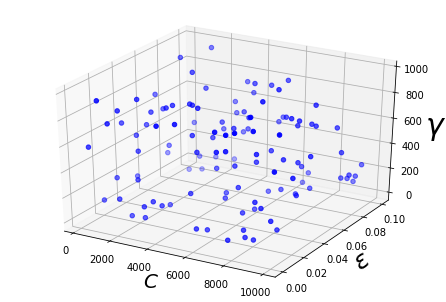






Experiment # 1: done. MSE_g_Best_val: 79026274.949835; MSE_AV_val: 79463231.078754; MSE_MD_val: 79276418.137164; MSE_k_AV_val: 79324631.986619; MSE_k_MD_val: 79200239.580519


MSE_g_Best: 109598626.543299; MSE_AV: 110785031.883989; MSE_MD: 110517574.836129; MSE_k_AV: 109144636.168979; MSE_k_MD: 109402768.898434


Experiment # 2: done. MSE_g_Best_val: 78954705.231375; MSE_AV_val: 79563585.598472; MSE_MD_val: 79319390.569681; MSE_k_AV_val: 79131378.830272; MSE_k_MD_val: 79188692.196670


MSE_g_Best: 109500121.647006; MSE_AV: 110389111.199045; MSE_MD: 109573458.665162; MSE_k_AV: 108933458.072580; MSE_k_MD: 109105748.420673


Experiment # 3: done. MSE_g_Best_val: 78990992.922638; MSE_AV_val: 79414347.571420; MSE_MD_val: 79042364.730892; MSE_k_AV_val: 78825660.169594; MSE_k_MD_val: 79087043.196837


MSE_g_Best: 109546618.010072; MSE_AV: 111099767.245015; MSE_MD: 109673679.895171; MSE_k_AV: 108992178.356829; MSE_k_MD: 109326899.009599


Experiment # 4: done. MSE_g_Best_val: 79011934.664

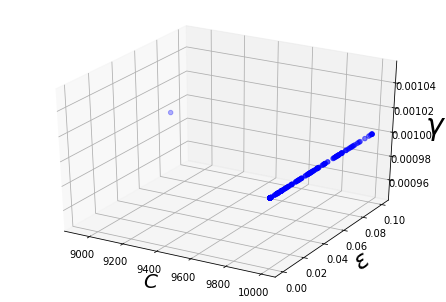






Mean Squared Error for the ARIMA Model:	 250179847.984915

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 78954705.231375

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79563585.598472

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79131378.830272

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79319390.569681

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79188692.196670

Best Configuration Found:

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.03743924703225894,
    gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)





ARIMA Model series` predicitions:



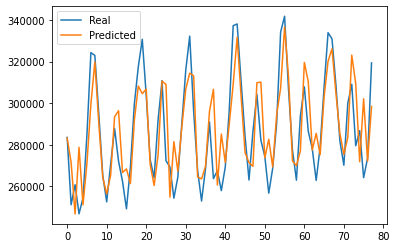


Ensemble Model series` predicitions:



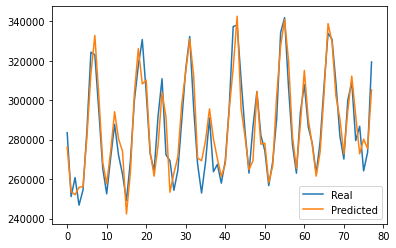


Ensemble Model best Average series` predicitions:



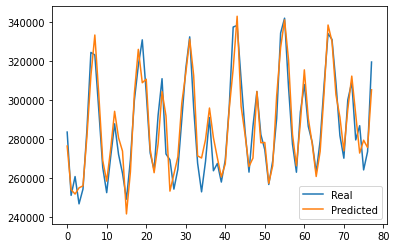


Ensemble Model K best Average series` predicitions:



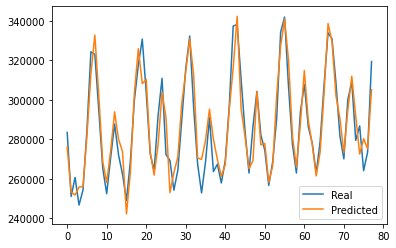


Ensemble Model best Median series` predicitions:



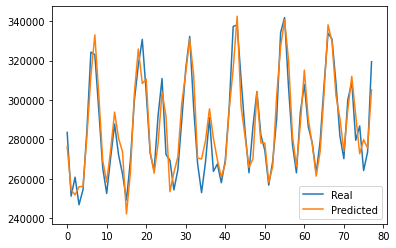


Ensemble Model K best Median series` predicitions:



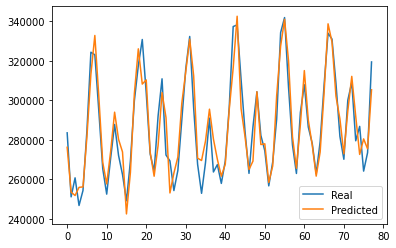






 Displaying Results for the test set



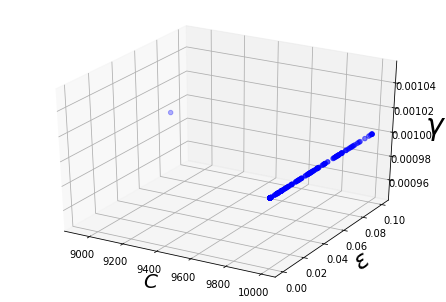






Mean Squared Error for the ARIMA Model:	 341984303.834694

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 109500121.647006

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 110389111.199045

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 108933458.072580

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 109573458.665162

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 109105748.420673

Best Configuration Found:

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.03743924703225894,
    gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)





ARIMA Model series` predicitions:



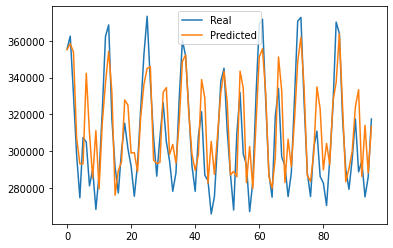


Ensemble Model series` predicitions:



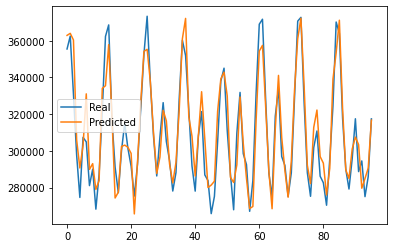


Ensemble Model best Average series` predicitions:



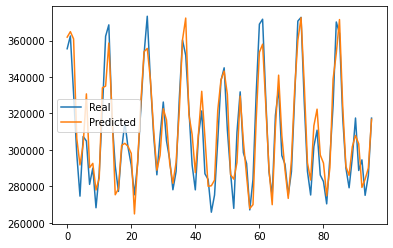


Ensemble Model K best Average series` predicitions:



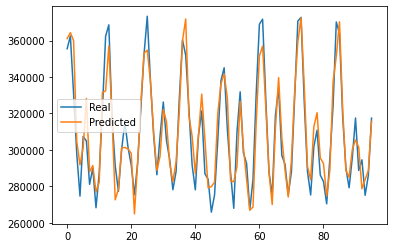


Ensemble Model best Median series` predicitions:



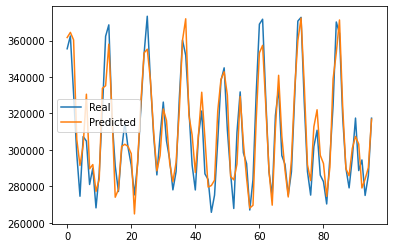


Ensemble Model K best Median series` predicitions:



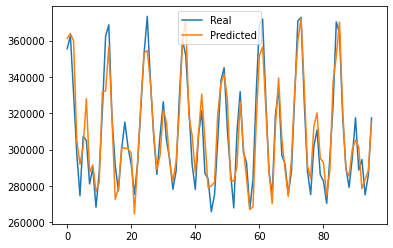






Best G-best on val set: Experiment # 2 . Mean Squared Error = 78954705.231375


Best G-best on test set: Experiment # 2 . Mean Squared Error = 109500121.647006



In [138]:
pso(120, 100, 3, 1, 5, 5)

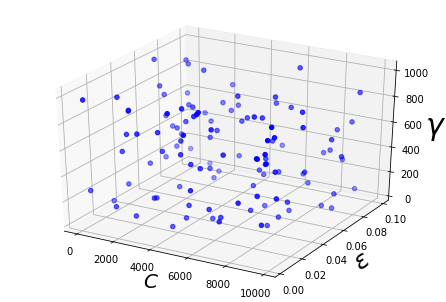






Experiment # 1: done. MSE_g_Best_val: 78984809.572449; MSE_AV_val: 79706427.335764; MSE_MD_val: 79781925.491385; MSE_k_AV_val: 78531663.239768; MSE_k_MD_val: 78109115.355247


MSE_g_Best: 109557882.920486; MSE_AV: 110585401.201883; MSE_MD: 111569580.650406; MSE_k_AV: 109190429.162906; MSE_k_MD: 109531132.549069


Experiment # 2: done. MSE_g_Best_val: 79019767.310324; MSE_AV_val: 79677387.661063; MSE_MD_val: 79850052.441521; MSE_k_AV_val: 79022536.047109; MSE_k_MD_val: 79198301.374729


MSE_g_Best: 109590763.839974; MSE_AV: 110536298.121760; MSE_MD: 109408300.742519; MSE_k_AV: 109179269.788368; MSE_k_MD: 110067444.779718


Experiment # 3: done. MSE_g_Best_val: 78991362.259393; MSE_AV_val: 79651937.221447; MSE_MD_val: 79582508.701915; MSE_k_AV_val: 78985996.585162; MSE_k_MD_val: 78964558.400101


MSE_g_Best: 109485659.574471; MSE_AV: 110581971.556233; MSE_MD: 110514636.507033; MSE_k_AV: 109086883.023337; MSE_k_MD: 110252094.707307


Experiment # 4: done. MSE_g_Best_val: 79368062.667

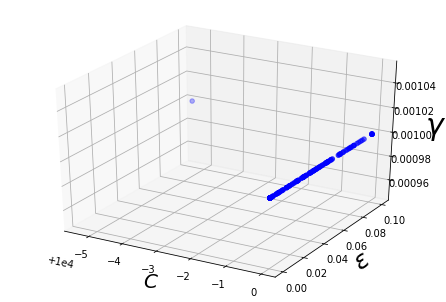






Mean Squared Error for the ARIMA Model:	 250179847.984915

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 78907758.001721

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79592080.356516

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 78757124.431032

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79303644.823341

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79061611.586096

Best Configuration Found:

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.03846958601164605,
    gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)





ARIMA Model series` predicitions:



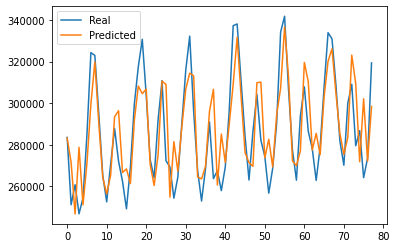


Ensemble Model series` predicitions:



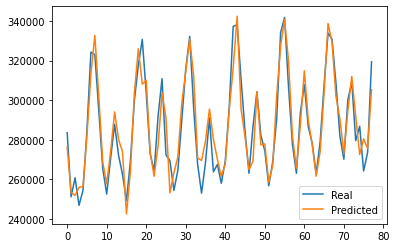


Ensemble Model best Average series` predicitions:



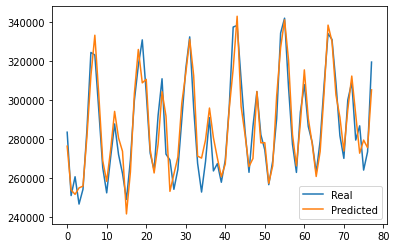


Ensemble Model K best Average series` predicitions:



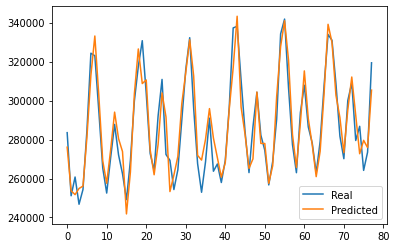


Ensemble Model best Median series` predicitions:



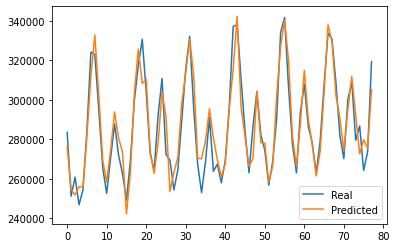


Ensemble Model K best Median series` predicitions:



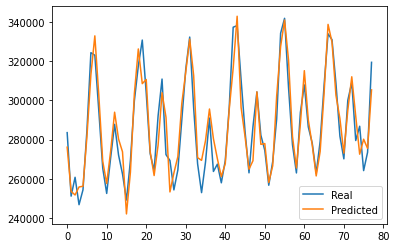






 Displaying Results for the test set



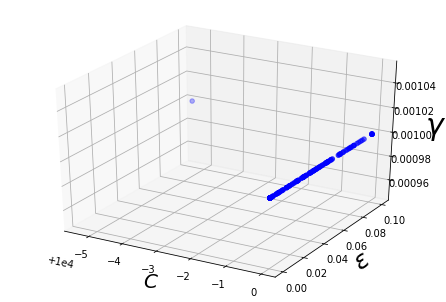






Mean Squared Error for the ARIMA Model:	 341984303.834694

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 109435302.203310

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 110603258.261430

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 109051215.124852

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 109647308.418485

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 109923725.246823

Best Configuration Found:

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.03846958601164605,
    gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)





ARIMA Model series` predicitions:



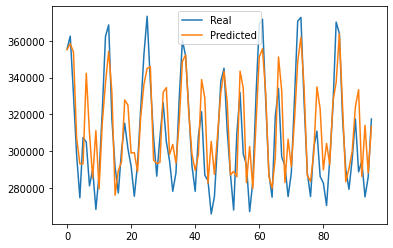


Ensemble Model series` predicitions:



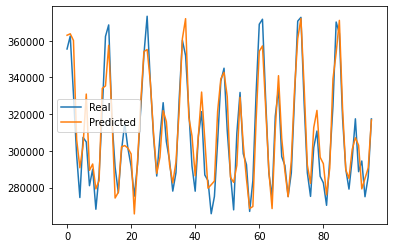


Ensemble Model best Average series` predicitions:



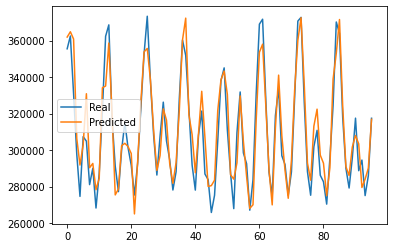


Ensemble Model K best Average series` predicitions:



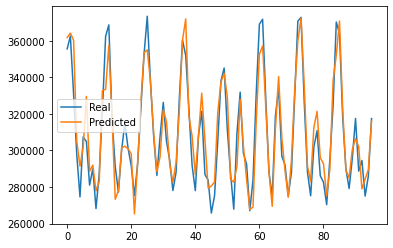


Ensemble Model best Median series` predicitions:



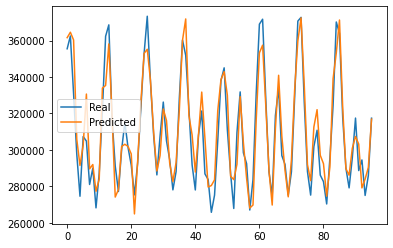


Ensemble Model K best Median series` predicitions:



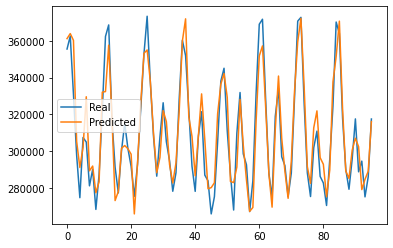






Best G-best on val set: Experiment # 5 . Mean Squared Error = 78907758.001721


Best G-best on test set: Experiment # 5 . Mean Squared Error = 109435302.203310



In [139]:
pso(120, 100, 3, 1, 10, 5)

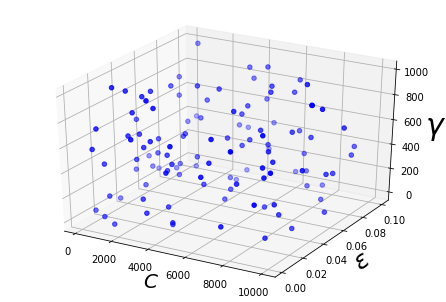






Experiment # 1: done. MSE_g_Best_val: 79010361.326837; MSE_AV_val: 79729427.526361; MSE_MD_val: 79506161.118535; MSE_k_AV_val: 79096384.745003; MSE_k_MD_val: 78829940.856932


MSE_g_Best: 109554061.025839; MSE_AV: 110515614.760307; MSE_MD: 109662146.895819; MSE_k_AV: 109281085.833968; MSE_k_MD: 110110114.124794


Experiment # 2: done. MSE_g_Best_val: 78967998.185328; MSE_AV_val: 79575117.818795; MSE_MD_val: 79423979.616075; MSE_k_AV_val: 78919531.127688; MSE_k_MD_val: 79436754.187201


MSE_g_Best: 109539304.266811; MSE_AV: 111071551.185821; MSE_MD: 110006468.733745; MSE_k_AV: 109626333.723776; MSE_k_MD: 109411101.182012


Experiment # 3: done. MSE_g_Best_val: 79006923.630292; MSE_AV_val: 79694336.140375; MSE_MD_val: 79608067.817473; MSE_k_AV_val: 78884083.172262; MSE_k_MD_val: 78905529.277009


MSE_g_Best: 109494832.928236; MSE_AV: 110768842.664450; MSE_MD: 109469859.164942; MSE_k_AV: 109112120.155078; MSE_k_MD: 109693087.058407


Experiment # 4: done. MSE_g_Best_val: 78997573.970

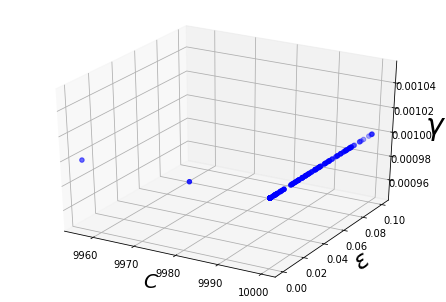






Mean Squared Error for the ARIMA Model:	 250179847.984915

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 78894764.566902

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79555391.703951

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79132123.569191

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79192180.779443

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79248924.703592

Best Configuration Found:

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.03841678042607071,
    gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)





ARIMA Model series` predicitions:



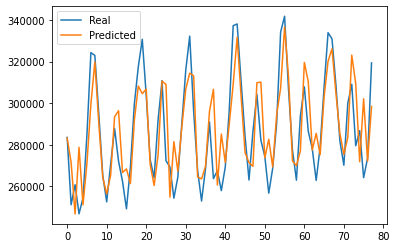


Ensemble Model series` predicitions:



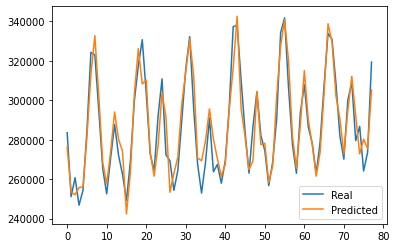


Ensemble Model best Average series` predicitions:



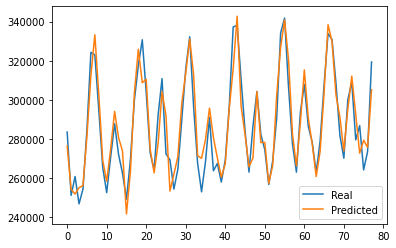


Ensemble Model K best Average series` predicitions:



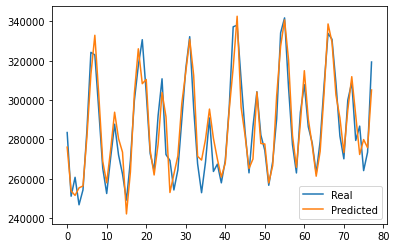


Ensemble Model best Median series` predicitions:



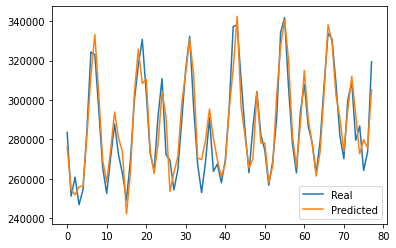


Ensemble Model K best Median series` predicitions:



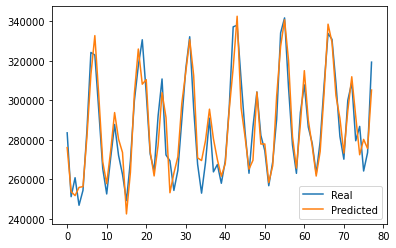






 Displaying Results for the test set



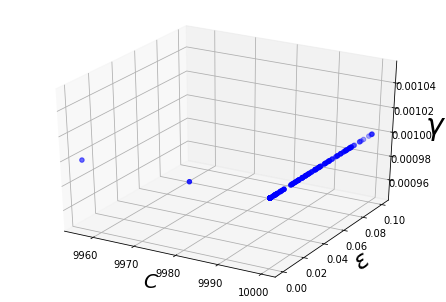






Mean Squared Error for the ARIMA Model:	 341984303.834694

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 109494832.928236

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 110768842.664450

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 109112120.155078

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 109469859.164942

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 109693087.058407

Best Configuration Found:

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.03841678042607071,
    gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)





ARIMA Model series` predicitions:



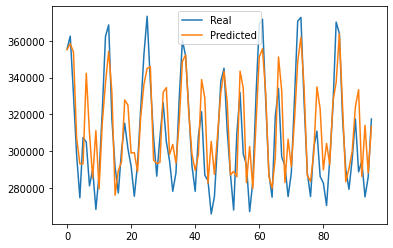


Ensemble Model series` predicitions:



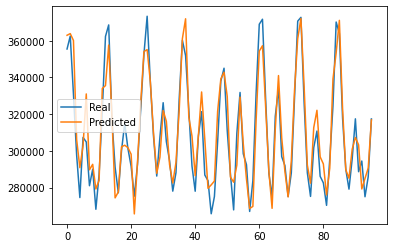


Ensemble Model best Average series` predicitions:



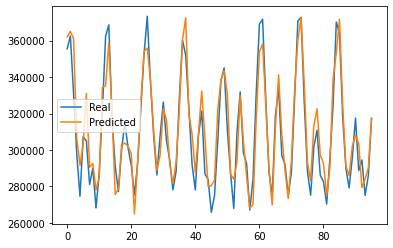


Ensemble Model K best Average series` predicitions:



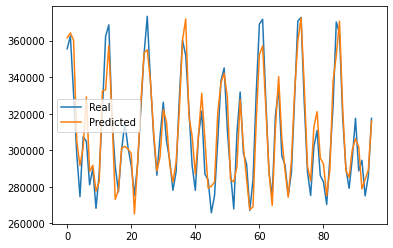


Ensemble Model best Median series` predicitions:



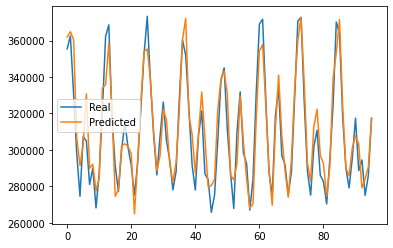


Ensemble Model K best Median series` predicitions:



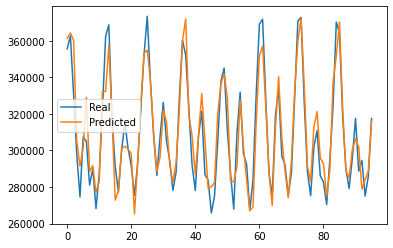






Best G-best on val set: Experiment # 5 . Mean Squared Error = 78894764.566902


Best G-best on test set: Experiment # 3 . Mean Squared Error = 109494832.928236



In [140]:
pso(120, 100, 3, 1, 20, 5)

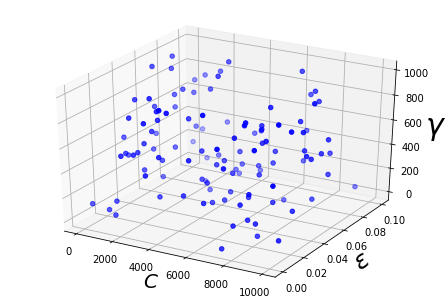






Experiment # 1: done. MSE_g_Best_val: 79018104.119516; MSE_AV_val: 79734953.496328; MSE_MD_val: 79401865.672683; MSE_k_AV_val: 78945245.300911; MSE_k_MD_val: 79069779.487263


MSE_g_Best: 109592507.743999; MSE_AV: 110475514.941584; MSE_MD: 109572186.563135; MSE_k_AV: 109475796.410919; MSE_k_MD: 109453926.477353


Experiment # 2: done. MSE_g_Best_val: 78991728.509284; MSE_AV_val: 79786165.194492; MSE_MD_val: 79581895.475818; MSE_k_AV_val: 79043855.421379; MSE_k_MD_val: 79166566.493528


MSE_g_Best: 109755610.719872; MSE_AV: 110632625.118655; MSE_MD: 109721068.004390; MSE_k_AV: 109444551.092737; MSE_k_MD: 109881900.617291


Experiment # 3: done. MSE_g_Best_val: 79027191.391746; MSE_AV_val: 79664951.968509; MSE_MD_val: 79540395.202578; MSE_k_AV_val: 79099929.240458; MSE_k_MD_val: 78970003.404338


MSE_g_Best: 109604227.103787; MSE_AV: 110525431.332312; MSE_MD: 110769037.863458; MSE_k_AV: 109410618.994241; MSE_k_MD: 110124859.024664


Experiment # 4: done. MSE_g_Best_val: 78978724.997

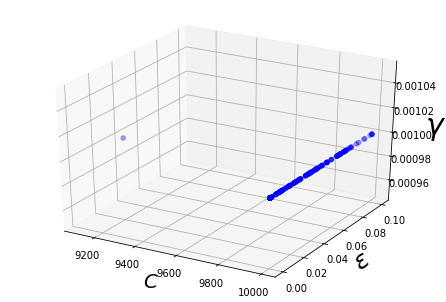






Mean Squared Error for the ARIMA Model:	 250179847.984915

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 78976970.215428

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79694069.636018

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79075194.173286

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79347552.760705

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79258521.943549

Best Configuration Found:

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.038720876703561176, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



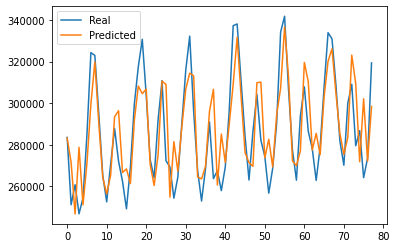


Ensemble Model series` predicitions:



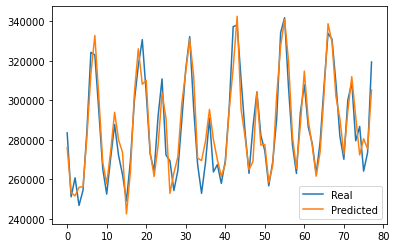


Ensemble Model best Average series` predicitions:



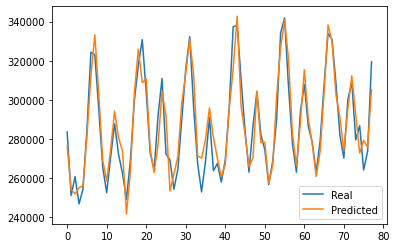


Ensemble Model K best Average series` predicitions:



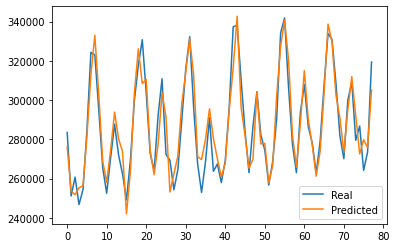


Ensemble Model best Median series` predicitions:



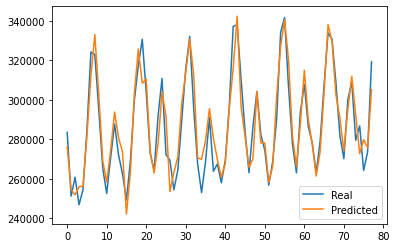


Ensemble Model K best Median series` predicitions:



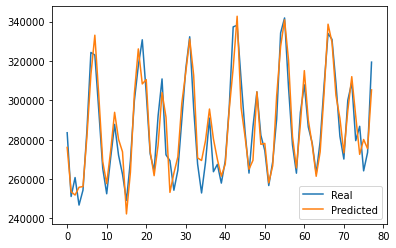






 Displaying Results for the test set



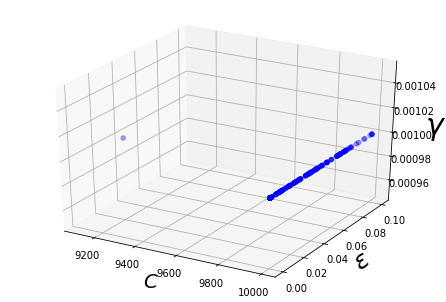






Mean Squared Error for the ARIMA Model:	 341984303.834694

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 109361643.952280

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 110445610.774272

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 109253890.822309

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 109395206.789059

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 109396876.918147

Best Configuration Found:

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.038720876703561176, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



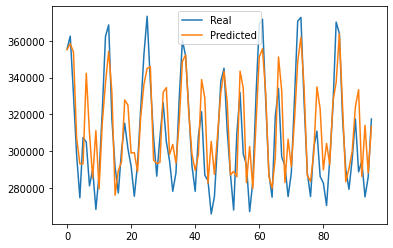


Ensemble Model series` predicitions:



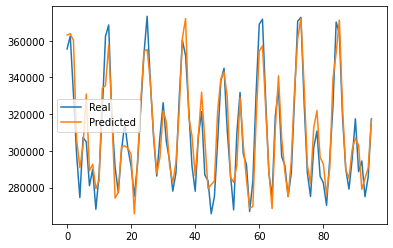


Ensemble Model best Average series` predicitions:



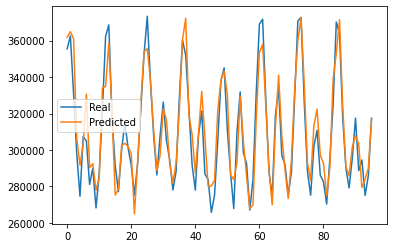


Ensemble Model K best Average series` predicitions:



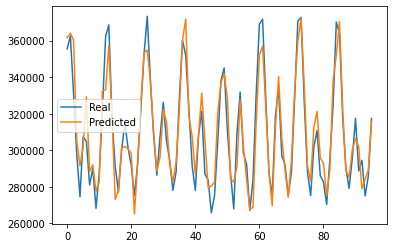


Ensemble Model best Median series` predicitions:



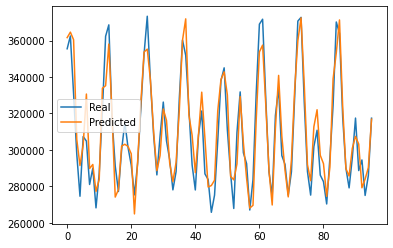


Ensemble Model K best Median series` predicitions:



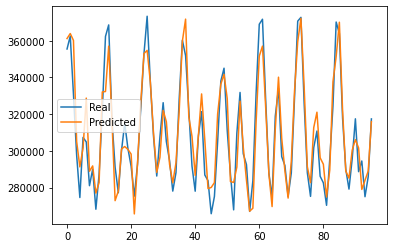






Best G-best on val set: Experiment # 5 . Mean Squared Error = 78976970.215428


Best G-best on test set: Experiment # 5 . Mean Squared Error = 109361643.952280



In [141]:
pso(120, 100, 3, 1, 30, 5)

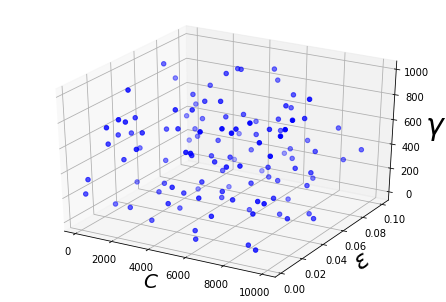






Experiment # 1: done. MSE_g_Best_val: 78970964.257090; MSE_AV_val: 79755101.985261; MSE_MD_val: 79674291.720188; MSE_k_AV_val: 79142849.768359; MSE_k_MD_val: 79117056.327560


MSE_g_Best: 109756328.586036; MSE_AV: 110517556.888820; MSE_MD: 110084617.336790; MSE_k_AV: 109488780.763763; MSE_k_MD: 110320878.414144


Experiment # 2: done. MSE_g_Best_val: 78932791.311117; MSE_AV_val: 79575860.918757; MSE_MD_val: 79379238.986648; MSE_k_AV_val: 79063334.761330; MSE_k_MD_val: 79363555.592397


MSE_g_Best: 109658099.368207; MSE_AV: 110660786.538032; MSE_MD: 110292643.710798; MSE_k_AV: 109870019.921487; MSE_k_MD: 109739521.297739


Experiment # 3: done. MSE_g_Best_val: 78961385.543490; MSE_AV_val: 79505673.421242; MSE_MD_val: 79389302.430133; MSE_k_AV_val: 78813385.689331; MSE_k_MD_val: 78603310.569610


MSE_g_Best: 109462577.153567; MSE_AV: 110518933.771617; MSE_MD: 109456317.382552; MSE_k_AV: 109453329.691369; MSE_k_MD: 109883541.280415


Experiment # 4: done. MSE_g_Best_val: 79000449.271

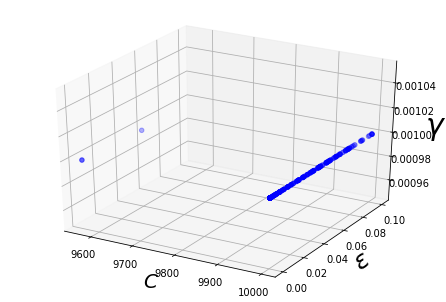






Mean Squared Error for the ARIMA Model:	 250179847.984915

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 78932791.311117

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79575860.918757

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79063334.761330

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79379238.986648

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79363555.592397

Best Configuration Found:

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.038356726826719686, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



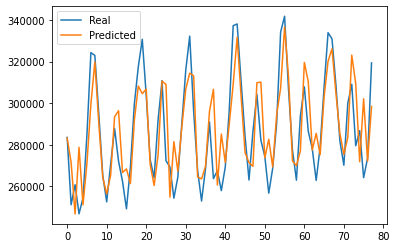


Ensemble Model series` predicitions:



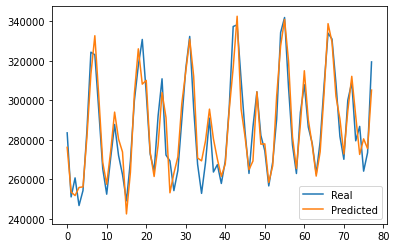


Ensemble Model best Average series` predicitions:



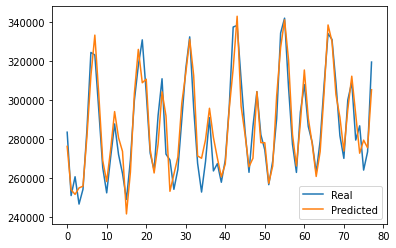


Ensemble Model K best Average series` predicitions:



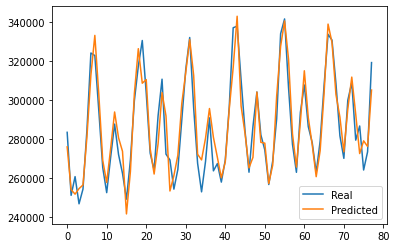


Ensemble Model best Median series` predicitions:



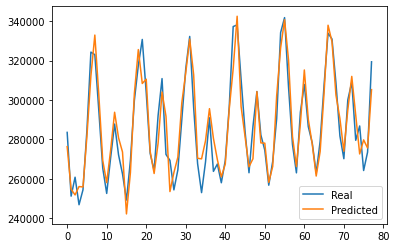


Ensemble Model K best Median series` predicitions:



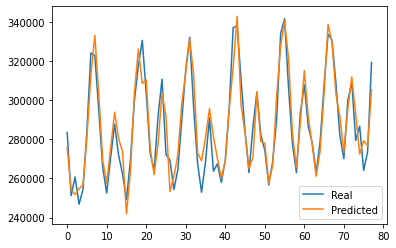






 Displaying Results for the test set



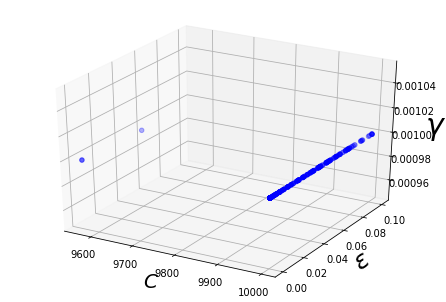






Mean Squared Error for the ARIMA Model:	 341984303.834694

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 109462577.153567

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 110518933.771617

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 109453329.691369

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 109456317.382552

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 109883541.280415

Best Configuration Found:

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.038356726826719686, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



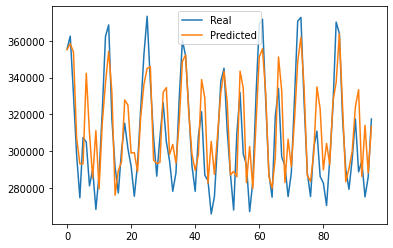


Ensemble Model series` predicitions:



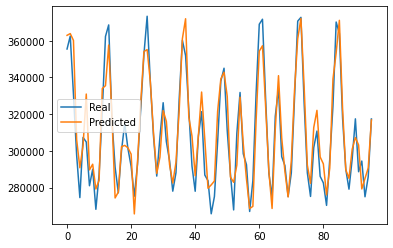


Ensemble Model best Average series` predicitions:



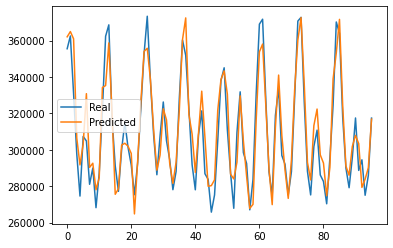


Ensemble Model K best Average series` predicitions:



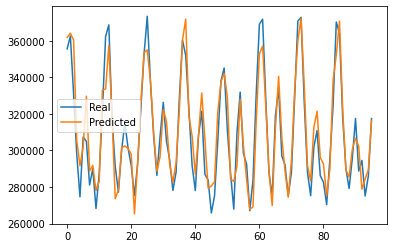


Ensemble Model best Median series` predicitions:



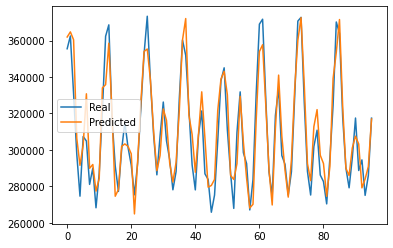


Ensemble Model K best Median series` predicitions:



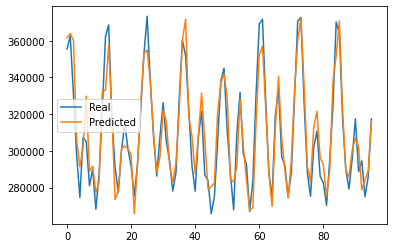






Best G-best on val set: Experiment # 2 . Mean Squared Error = 78932791.311117


Best G-best on test set: Experiment # 3 . Mean Squared Error = 109462577.153567



In [142]:
pso(120, 100, 3, 1, 40, 5)

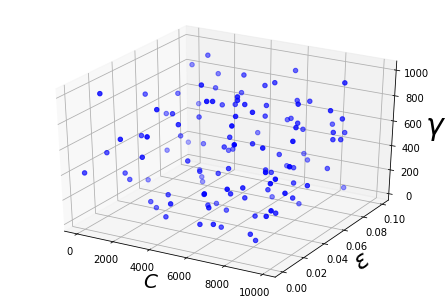






Experiment # 1: done. MSE_g_Best_val: 78979290.878876; MSE_AV_val: 79491830.627219; MSE_MD_val: 79230703.448525; MSE_k_AV_val: 78905593.046855; MSE_k_MD_val: 78927146.190216


MSE_g_Best: 109535012.185734; MSE_AV: 110859084.588818; MSE_MD: 109678448.902172; MSE_k_AV: 109839917.294452; MSE_k_MD: 109835259.134466


Experiment # 2: done. MSE_g_Best_val: 78981946.627757; MSE_AV_val: 79650145.793118; MSE_MD_val: 79463487.824347; MSE_k_AV_val: 79009719.449785; MSE_k_MD_val: 78825261.177759


MSE_g_Best: 109772756.820820; MSE_AV: 110592806.226482; MSE_MD: 109615486.553249; MSE_k_AV: 109452636.420990; MSE_k_MD: 110100273.529625


Experiment # 3: done. MSE_g_Best_val: 79018014.870727; MSE_AV_val: 79391893.892351; MSE_MD_val: 79508818.539193; MSE_k_AV_val: 78981907.104621; MSE_k_MD_val: 78827256.455212


MSE_g_Best: 109569459.674364; MSE_AV: 111219444.922456; MSE_MD: 110296159.192855; MSE_k_AV: 109780112.460017; MSE_k_MD: 109445945.677524


Experiment # 4: done. MSE_g_Best_val: 78968350.944

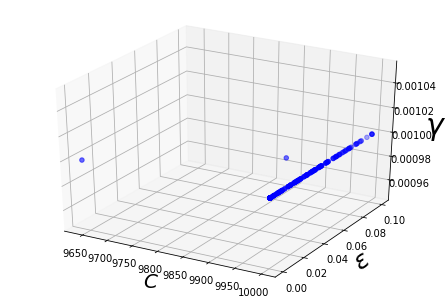






Mean Squared Error for the ARIMA Model:	 250179847.984915

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 78968350.944088

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79616407.177522

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79141418.299402

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79484474.753490

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79193288.336533

Best Configuration Found:

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.03831450420663371,
    gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)





ARIMA Model series` predicitions:



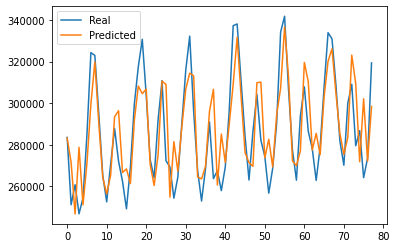


Ensemble Model series` predicitions:



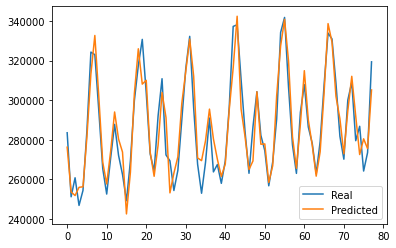


Ensemble Model best Average series` predicitions:



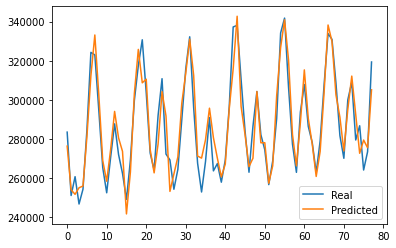


Ensemble Model K best Average series` predicitions:



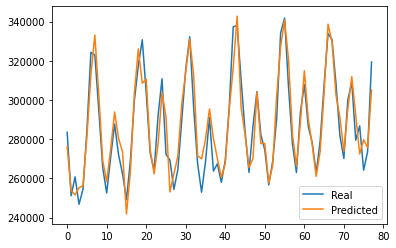


Ensemble Model best Median series` predicitions:



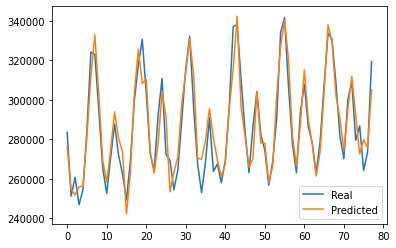


Ensemble Model K best Median series` predicitions:



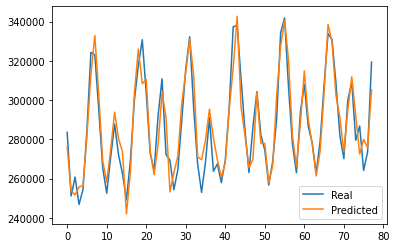






 Displaying Results for the test set



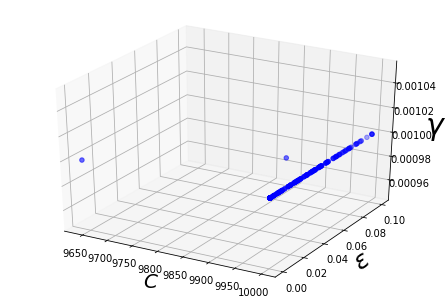






Mean Squared Error for the ARIMA Model:	 341984303.834694

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 109478641.553636

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 110386884.223763

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 109519141.790648

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 109628195.547043

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 110222533.625883

Best Configuration Found:

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.03831450420663371,
    gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)





ARIMA Model series` predicitions:



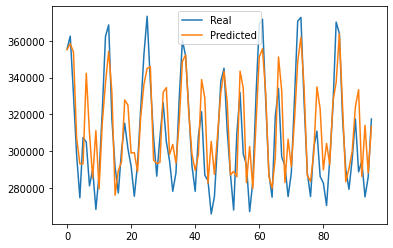


Ensemble Model series` predicitions:



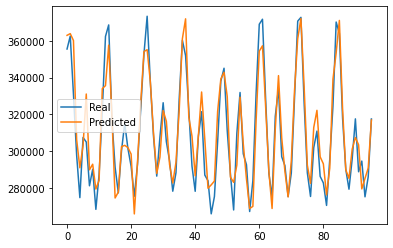


Ensemble Model best Average series` predicitions:



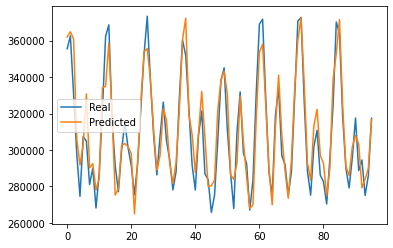


Ensemble Model K best Average series` predicitions:



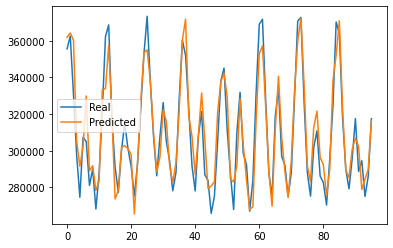


Ensemble Model best Median series` predicitions:



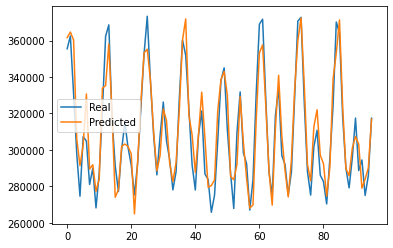


Ensemble Model K best Median series` predicitions:



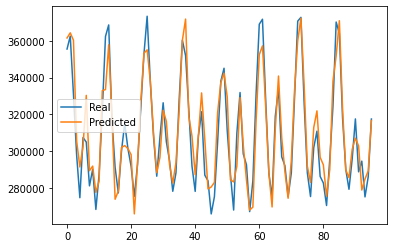






Best G-best on val set: Experiment # 4 . Mean Squared Error = 78968350.944088


Best G-best on test set: Experiment # 4 . Mean Squared Error = 109478641.553636



In [143]:
pso(120, 100, 3, 1, 50, 5)

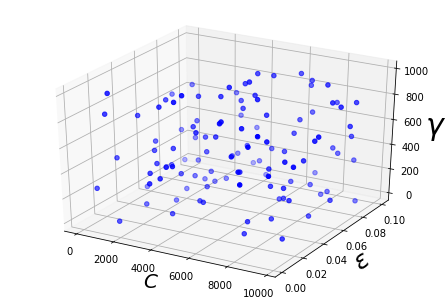






Experiment # 1: done. MSE_g_Best_val: 78970377.277204; MSE_AV_val: 79636001.752259; MSE_MD_val: 79381906.729078; MSE_k_AV_val: 79290463.231213; MSE_k_MD_val: 79293691.046061


MSE_g_Best: 109571344.643324; MSE_AV: 110311742.758149; MSE_MD: 109351453.066424; MSE_k_AV: 109796274.875153; MSE_k_MD: 109889778.547137


Experiment # 2: done. MSE_g_Best_val: 78974764.173612; MSE_AV_val: 79519851.679625; MSE_MD_val: 79544144.041765; MSE_k_AV_val: 79282838.006769; MSE_k_MD_val: 79329333.854814


MSE_g_Best: 109708592.216546; MSE_AV: 110775429.713712; MSE_MD: 109813561.229101; MSE_k_AV: 109764292.638097; MSE_k_MD: 109708530.890336


Experiment # 3: done. MSE_g_Best_val: 78968162.019227; MSE_AV_val: 79497301.955529; MSE_MD_val: 79246934.411515; MSE_k_AV_val: 79201513.430872; MSE_k_MD_val: 78775867.930903


MSE_g_Best: 109595412.219917; MSE_AV: 110451234.005004; MSE_MD: 109655409.630223; MSE_k_AV: 109839867.150601; MSE_k_MD: 109550538.350470


Experiment # 4: done. MSE_g_Best_val: 78949168.746

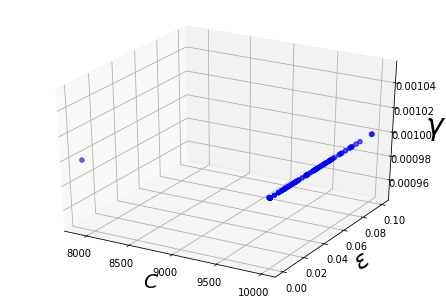






Mean Squared Error for the ARIMA Model:	 250179847.984915

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 78949168.746070

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79584503.199077

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 79164965.125937

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 79706146.545881

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 78936010.569996

Best Configuration Found:

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.03832481545938271,
    gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)





ARIMA Model series` predicitions:



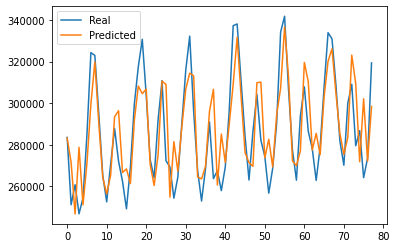


Ensemble Model series` predicitions:



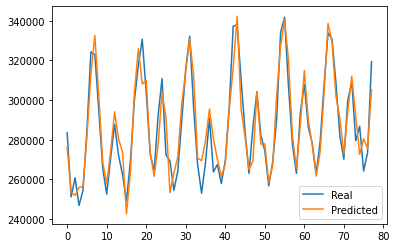


Ensemble Model best Average series` predicitions:



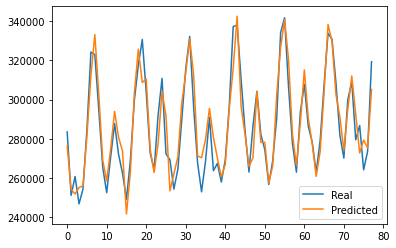


Ensemble Model K best Average series` predicitions:



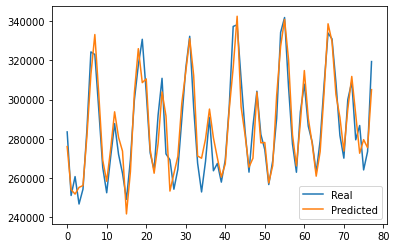


Ensemble Model best Median series` predicitions:



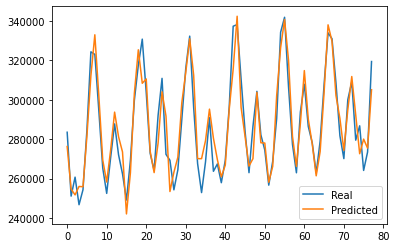


Ensemble Model K best Median series` predicitions:



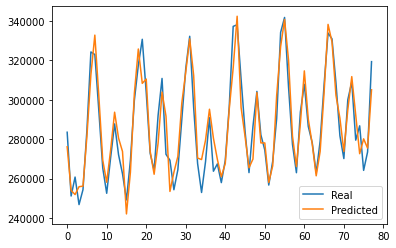






 Displaying Results for the test set



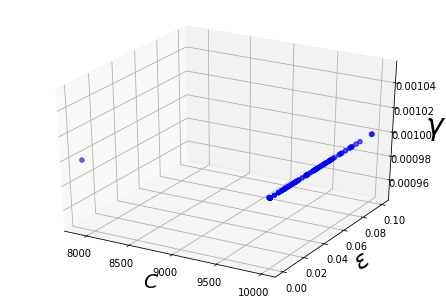






Mean Squared Error for the ARIMA Model:	 341984303.834694

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 109571344.643324

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 110311742.758149

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 109796274.875153

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 109351453.066424

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 109889778.547137

Best Configuration Found:

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.03832481545938271,
    gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)





ARIMA Model series` predicitions:



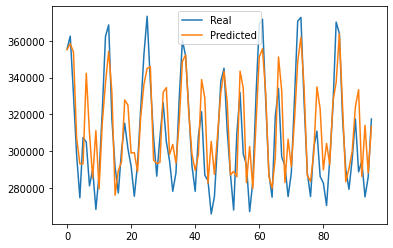


Ensemble Model series` predicitions:



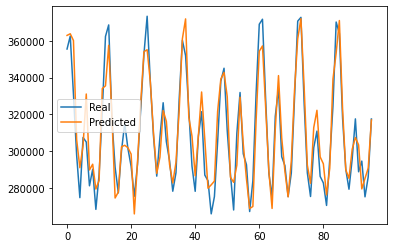


Ensemble Model best Average series` predicitions:



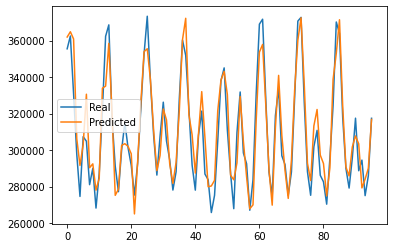


Ensemble Model K best Average series` predicitions:



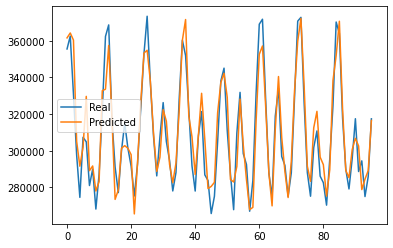


Ensemble Model best Median series` predicitions:



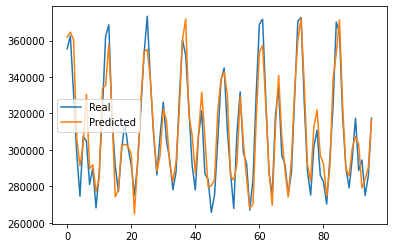


Ensemble Model K best Median series` predicitions:



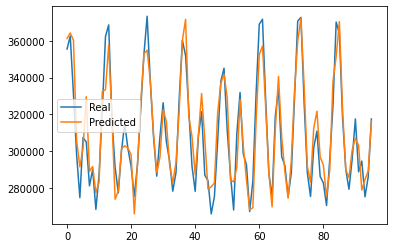






Best G-best on val set: Experiment # 4 . Mean Squared Error = 78949168.746070


Best G-best on test set: Experiment # 1 . Mean Squared Error = 109571344.643324



In [144]:
pso(120, 100, 3, 1, 60, 5)